In [3]:

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt


In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [5]:
folder_path = 'Crop_Disease/Wheat'


dataset = tf.keras.preprocessing.image_dataset_from_directory(
    folder_path,
    seed=123,
    shuffle=True,
    image_size=(255,255),
    batch_size=32
)


Found 2942 files belonging to 3 classes.


In [6]:

class_names = dataset.class_names
class_names

['Wheat___Brown_Rust', 'Wheat___Healthy', 'Wheat___Yellow_Rust']

In [7]:
dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 255, 255, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:


# Check if the dataset is empty
print("Number of batches:", tf.data.experimental.cardinality(dataset).numpy())

# Iterate through the dataset
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

Number of batches: 92
(32, 255, 255, 3)
[1 0 1 0 2 1 2 0 2 2 2 1 0 2 1 0 1 2 2 1 0 2 1 1 0 2 2 1 1 0 1 1]


In [9]:
class_name= dataset.class_names
class_name

['Wheat___Brown_Rust', 'Wheat___Healthy', 'Wheat___Yellow_Rust']

In [10]:
len(dataset)

92

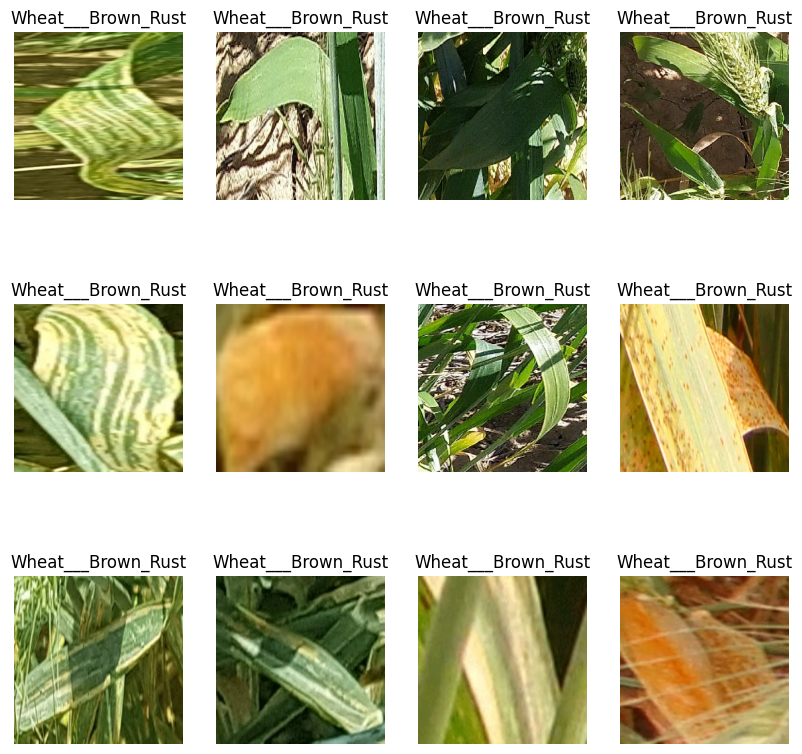

In [11]:
plt.figure(figsize=(10,10))
for images1 , labels1 in  dataset.take(1) :
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(images1[i].numpy().astype('int'))
        plt.axis('off')
        plt.title(class_name[labels1[i].numpy().argmax()])  

In [46]:
train_data=dataset.take(74)
len(train_data)

74

In [47]:
test_data=dataset.skip(71)
len(test_data)

21

In [48]:
val_ds = test_data.take(7)
len(val_ds)

7

In [49]:
test_ds = test_data.skip(7)
len(test_data)
print(len(list(test_ds)))

14


In [50]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    print(ds_size)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [51]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

92


In [52]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(255, 255),
    layers.Rescaling(1./255),
])

In [53]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [54]:
n_classes = 4
input_shape = (255, 255, 3)  # Remove batch size

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),  # Define input shape
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [55]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 255, 255, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 253, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [57]:
history = model.fit(
    train_ds,
    batch_size=32,
    validation_data=val_ds,
    verbose=1,
    epochs=40, 
)

Epoch 1/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5537 - loss: 0.8606 - val_accuracy: 0.8507 - val_loss: 0.4137
Epoch 2/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 73s 976ms/step - accuracy: 0.8139 - loss: 0.4275 - val_accuracy: 0.8646 - val_loss: 0.4014
Epoch 3/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 73s 973ms/step - accuracy: 0.8405 - loss: 0.3516 - val_accuracy: 0.9097 - val_loss: 0.2384
Epoch 4/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 73s 971ms/step - accuracy: 0.9361 - loss: 0.1798 - val_accuracy: 0.9722 - val_loss: 0.1394
Epoch 5/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 73s 973ms/step - accuracy: 0.9394 - loss: 0.1627 - val_accuracy: 0.9476 - val_loss: 0.1583
Epoch 6/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 73s 973ms/step - accuracy: 0.9607 - loss: 0.1225 - val_accuracy: 0.9510 - val_loss: 0.1041
Epoch 7/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 73s 969ms/step - accuracy: 0.9446 - loss: 0.1494 - val_accuracy: 0.9549 - val_loss: 0.1103
Epoch 8/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 72s 959ms/step - accuracy: 0.9630 - loss: 0.1102 - val_accurac

In [58]:
scores = model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - accuracy: 1.0000 - loss: 0.0015


In [59]:
scores

[0.0021673450246453285, 1.0]

In [60]:
history

In [61]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 73}

In [62]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [64]:
print(len(acc), len(val_acc))  # Check lengths
print(len(loss), len(val_loss))  # Check lengths


40 40
40 40


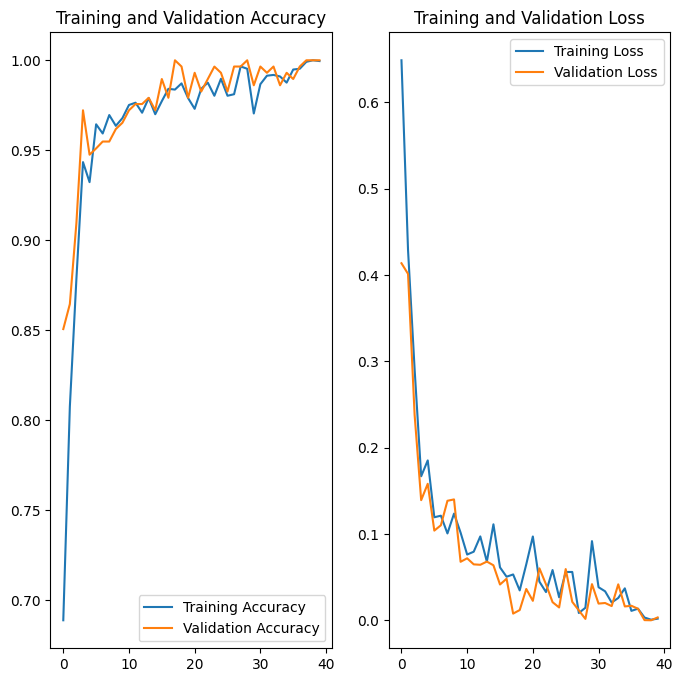

In [65]:
epochs = len(acc)  # or len(val_acc), since both are 20

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [66]:
model.save("wheat.h5")


In [70]:
from PIL import Image
import numpy as np
image_path = "Crop_Disease\Wheat\Wheat___Healthy\Healthy013.jpg" 
image = Image.open(image_path)
img_array = tf.keras.preprocessing.image.img_to_array(image)
img_array = tf.expand_dims(img_array, 0)

predictions=model.predict(img_array)

predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


<>:3: SyntaxWarning: invalid escape sequence '\W'
<>:3: SyntaxWarning: invalid escape sequence '\W'
C:\Users\PMLS\AppData\Local\Temp\ipykernel_9120\1657561685.py:3: SyntaxWarning: invalid escape sequence '\W'
  image_path = "Crop_Disease\Wheat\Wheat___Healthy\Healthy013.jpg"


array([[4.14377293e-14, 1.00000000e+00, 1.01864345e-13, 9.91657026e-33]],
      dtype=float32)

In [71]:
predicted_class = class_names[np.argmax(predictions)]
print (predicted_class)
print (np.max(predictions))

Wheat___Healthy
1.0


In [68]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions)), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


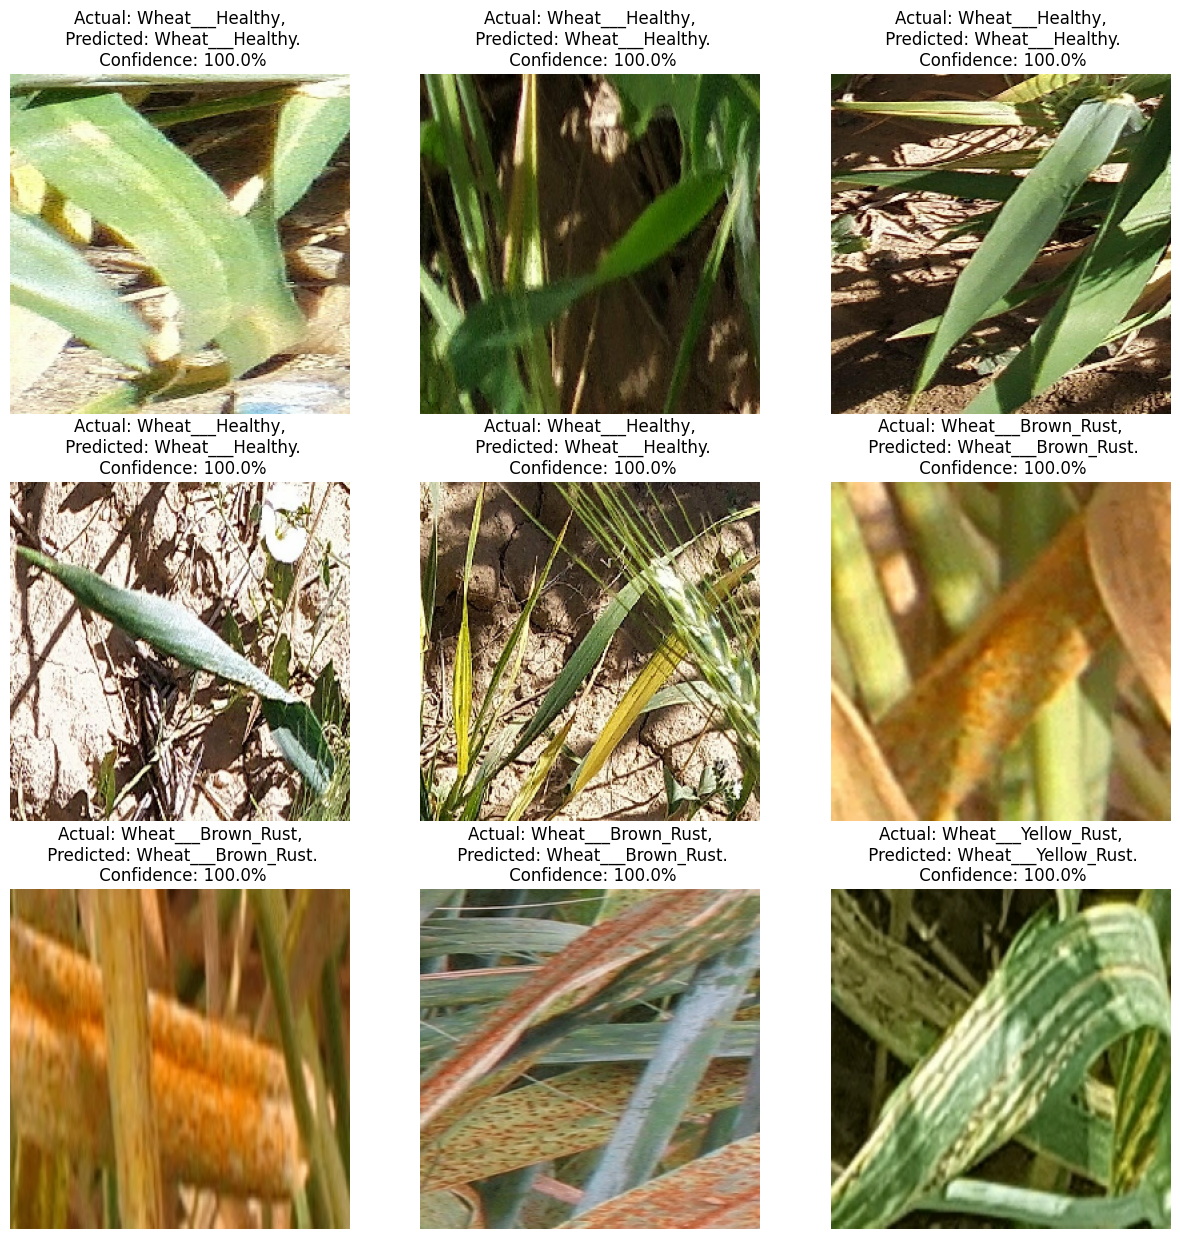

In [69]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("int"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")